<a href="https://colab.research.google.com/github/sakib927/Start-Tech-June-22/blob/main/Start_Tech_Task_2_Prob_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing library 

In [1]:
from keras.models import Sequential

In [2]:
import tensorflow as tf

import tensorflow_datasets as tfds


In [3]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import  RMSprop, adam
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import theano
from tqdm import tqdm 
from skimage import io

Importing The Dataset

In [25]:
path_test = "/content/drive/MyDrive/Osteoarthritis_train"
class_names = ['Normal','Osteoarthritis']
nb_classes = len(class_names)
image_size = (256,256)

Loading The dataset and labeling it

In [5]:
def load_data():
    
    datasets = ['/content/drive/MyDrive/Osteoarthritis_train']
    images = []
    labels = []

    # iterate through training and test sets
    count =0
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['Normal']: label = 1
            elif folder in ['Osteoarthritis']: label = 2
            else : print(700)


            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open 
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [6]:
images, labels = load_data()

100%|██████████| 1589/1589 [00:24<00:00, 63.68it/s] 


Spliting the Train And Test Data

In [7]:
images, labels = shuffle(images, labels, random_state=10)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [8]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 2892
Number of validation examples: 362
Number of testing examples: 361
Training images are of shape: (2892, 256, 256, 3)
Training labels are of shape: (2892,)
Validation images are of shape: (362, 256, 256, 3)
Validation labels are of shape: (362,)
Test images are of shape: (361, 256, 256, 3)
Test labels are of shape: (361,)


Filtering the data

In [9]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [10]:
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Building The Model

In [16]:
nb_classes = 3
nb_epochs = 10
img_rows, img_columns = 256, 256
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3,  activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2  = model.fit(train_images, train_labels, epochs = nb_epochs, verbose = 1, validation_data = (test_images, test_labels))

Epoch 1/10
91/91 [==============================] - 207s 2s/step - loss: 1.1819 - accuracy: 0.5456 - val_loss: 0.6782 - val_accuracy: 0.5402
Epoch 2/10
91/91 [==============================] - 206s 2s/step - loss: 0.6748 - accuracy: 0.5768 - val_loss: 0.6774 - val_accuracy: 0.5235
Epoch 3/10
91/91 [==============================] - 205s 2s/step - loss: 0.6733 - accuracy: 0.5844 - val_loss: 0.7505 - val_accuracy: 0.4626
Epoch 4/10
91/91 [==============================] - 202s 2s/step - loss: 0.6643 - accuracy: 0.6027 - val_loss: 0.6680 - val_accuracy: 0.5706
Epoch 5/10
91/91 [==============================] - 204s 2s/step - loss: 0.6289 - accuracy: 0.6390 - val_loss: 0.6579 - val_accuracy: 0.5817
Epoch 6/10
91/91 [==============================] - 203s 2s/step - loss: 0.6216 - accuracy: 0.6432 - val_loss: 0.6508 - val_accuracy: 0.6427
Epoch 7/10
91/91 [==============================] - 207s 2s/step - loss: 0.6078 - accuracy: 0.6580 - val_loss: 0.6462 - val_accuracy: 0.6537
Epoch 8/10
91

In [18]:
score = model.evaluate(test_images, test_labels, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.6411809921264648
Test accuracy:  0.673130214214325


Visualizing The results 

In [19]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(10)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

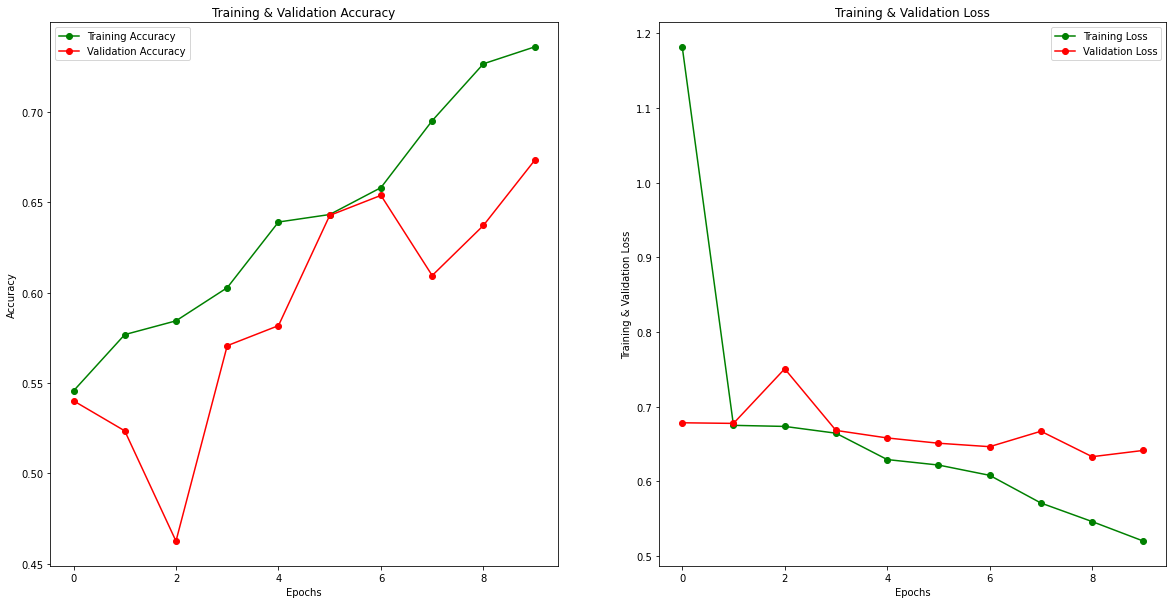

In [20]:
plot_accuracy_loss_chart(history2)

Model Evaluation

In [21]:
results = model.evaluate(test_images, test_labels)

print("Loss of the model  is - test ", results[0])
print("Accuracy of the model is - test", results[1]*100, "%")


results = model.evaluate(val_images, val_labels)

print("Loss of the model  is - val ", results[0])
print("Accuracy of the model is - val", results[1]*100, "%")

results = model.evaluate(train_images, train_labels)

print("Loss of the model  is - train ", results[0])
print("Accuracy of the model is - train", results[1]*100, "%")

12/12 [==============================] - 6s 531ms/step - loss: 0.6412 - accuracy: 0.6731
Loss of the model  is - test  0.6411809921264648
Accuracy of the model is - test 67.3130214214325 %
12/12 [==============================] - 6s 531ms/step - loss: 0.5830 - accuracy: 0.7238
Loss of the model  is - val  0.5829643607139587
Accuracy of the model is - val 72.37569093704224 %
91/91 [==============================] - 51s 563ms/step - loss: 0.4902 - accuracy: 0.7697
Loss of the model  is - train  0.49016544222831726
Accuracy of the model is - train 76.97095274925232 %


Model Prediction

In [22]:
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)
predictions[:100]

array([2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2])

Creating a Confusion Matrix

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import pandas as pd

cm = confusion_matrix(test_labels, predictions)
cm = pd.DataFrame(cm, index = ['1', '2'], columns = ['1', '2'])
cm

,1,2
1,55,106
2,12,188


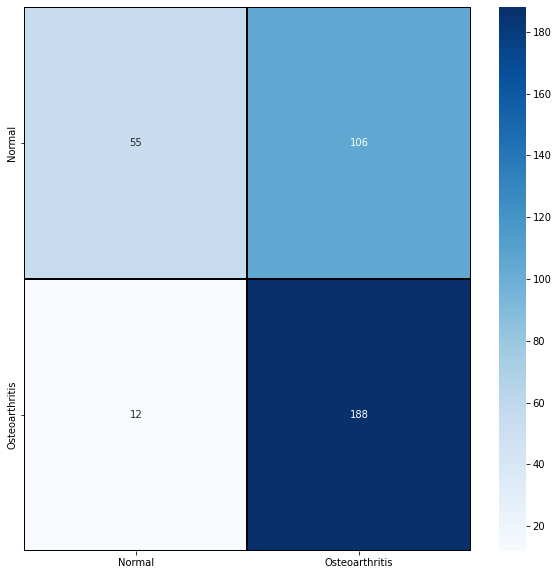

In [26]:
import seaborn as sns
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)
